In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
palette = 'colorblind'
sns.set_palette(palette); sns.set_color_codes(palette) 

## Probabilidad

Las probabilidades son números en el intervalo [0, 1], es decir números que van entre 0 y 1 (incluyendo ambos extremos) y que cumplen con las dos siguientes reglas.

La regla de la suma:
$$p(A) + p(A^c) = 1$$ 

Esto se lee como, _la probabilidad de A más la probabilidad del complemento de A (o la probabilidad de no-A) es igual a 1_. Es decir siempre algo sucede.

La regla del producto:
$$p(A, B) = p(A|B) \times p(B)$$ 

Esto se lee como la _probabilidad de que A y B ocurran es la probabilidad de A dado B por la probabilidad de B_. 


$p(A|B)$ es lo que se conoce como probabilidad condicional, y es la probabilidad de que ocurra A condicionada por el hecho que sabemos que B ha ocurrido. Por ejemplo la probabilidad que una vereda esté mojada es diferente de la probabilidad que la misma vereda esté mojada dado que está lloviendo. Una probabilidad condicional puede ser mayor, menor o igual que la probabiliad no-condicionada. Si el conocer B no ofrece información sobre A entonces $p(A|B) = p(A)$, y entonces A y B serán independientes. Al contrario si conocer B nos da información sobre A entonces la probabiliad condicional será mayor o menor que la no-condicionada dependiendo de si B nos hace que A sea menos o más probable.

Estrictamente todas las probabilidades son condicionales (respecto de algún supuesto o modelo) aún cuando no lo expresemos explícitamente. Podríamos decir que no existen probabilidades sin contexto.

La probabilidad clásica, a veces también llamada _naive_, asume que todos los eventos son igualmente probables. Puede ser útil para calcular la probabilidad de tirar un dado y obtener el número 2, que bajo esta definición será de ($\frac{1}{6}$). Pero puede llevar a errores si pretendemos usar la misma lógica para computar la probabilidad de vida en Marte. Por ejemplo podríamos asumir que o bien hay o bien no hay vida en Marte y por lo tanto llegar a la errónea estimación de que la probabilidad de vida en Marte es de 0.5!

$$p(x) = \frac{n_x}{n_t}$$

donde $n_x$ es el número de eventos favorables y $n_t$ es el número total de eventos.

### Probabilidad frecuentista

La probabilidad frecuentista es empírica. En vez de asumir que los eventos son igualmente probables diseñamos un experimentos (en el sentido muy amplio de la palabra) y contamos cuantas veces vemos el evento que nos interesa respecto del total de intentos. Esta definición de probabilidad nos permitiría estimar que la probabilidad de obtener 2 al arrojar un dado 100 veces es de por ejemplo $\frac{1}{3}$. Notese que la probabilidad solo sería $\frac{1}{6}$, si el dado no está cargado, si el experimento está bien hecho y si el número de intentos es infinito (a los fines prácticos podemos reducir esta condición y considerar queel  _infinito_ se alcanza con unos pocos miles de intentos!).

La definición frecuentista de probabilidad tiene el problema que no es muy útil para pensar en problemas que ocurren una sola vez. Por ejemplo, ¿Cuál es la probabilidad que mañana llueva? Estrictamente solo hay un mañana y o bien lloverá o no. Los frecuentistas suelen evadir este problema recurriendo a experimentos imaginarios. En ese caso podríamos intentar estimar la probabilidad de lluvia para mañana imaginando que hay _infinitos mañanas_ y _contar_ en cuantos de esos _mañanas_ llueve  y en cuantos no.

$$p(x) = \lim_{n_t \rightarrow \infty} \frac{n_x}{n_t}$$

### Probabilidad Bayesiana

En estadística Bayesiana las probabilidades son usadas para cuantificar la incertidumbre que tenemos de que un evento ocurra. Si el evento es imposible entonces la probabilidad de ese evento será exactamente 0, si en cambio el evento siempre sucede entonces la probabilidad de ese evento será de 1. Todos los valores intermedios reflejan gradis de certeza/incerteza.

Desde este punto de vista es _natural_ preguntarse cual es la probabilidad que la masa de Saturno sea X, o hablar sobre la probabilidad de lluvia durante el 25 de Mayo de 1810, o la probabilidad de que mañana amanezca.

La probabilidad frecuentista y la clásica, son casos especiales de la probabilidad Bayesiana.

### Distribuciones de probabilidad

En estadística suele ser útil pensar que existe una distribución $h(x)$ a partir de la cual "se generan" los valores observados de $x$. La idea central de la estadística Bayesiana es invertir el proceso y estimar la distribución $h(x)$ a partir de los valores observados de $x$. La necesidad de realizar una _inferencia_ se debe a que en general $h(x)$, es una función que no puede ser observada directamente. Por lo tanto lo mejor que podemos hacer es construir un modelo $g(x)$ que sea consistente con $x$. La sospecha y esperanza (al menos de los _[realistas](http://es.wikipedia.org/wiki/Realismo_cient%C3%ADfico)_) es que mientras mejor explique $g(x)$ a $x$ más parecida será $g(x)$ a $h(x)$. Nuestro modelo, $g(x)$, podría ser por ejemplo una distribución Gaussiana, el modelo no está completo si no encontramos además los parámetros de esa distribución (que en este caso son dos, la media y desviación estándar).

Cuando $x$ puede tomar valores continuos, la función $g(x)$, es llamada función de densidad de probabilidad ($pdf$ por su sigla en inglés) y cuando $x$ solo puede tomar valores discretos, $g(x)$ es llamada función de masa de probabilidad ($pmf$ por su sigla en inglés). La $pdf$ cuantifica la probabilidad que un valor se encuentre entre $x$ y $x + dx$. A $x$ se la llama variable aleatoria, notese que _aleatoria_ no quiere decir que $x$ pueda tomar cualquier valor, de hecho solo puede tomar los valores definidos por $g(x)$.

A modo de ejemplo veamos como luce la $pdf$ de una distribución Gaussiana:

$$
g(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2}} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2}}
$$

Donde $x \in \mathbb{R}$ y $\sigma > 0$.

$x$, es la media de la distribución y $\sigma$, la desviación estándar.  


Todas las posibles curvas que resulten de la combinación de valores permitidos para estos dos parámetros serán curvas de la familia de la Gaussiana. A continuación tenemos algunos ejemplos.

La probabilidad clásica, a veces también llamada _naive_, asume que todos los eventos son igualmente probables. Puede ser útil para calcular la probabilidad de tirar un dado y obtener el número 2, que bajo esta definición será de ($\frac{1}{6}$). Pero puede llevar a errores si pretendemos usar la misma lógica para computar la probabilidad de vida en Marte. Por ejemplo podríamos asumir que o bien hay o bien no hay vida en Marte y por lo tanto llegar a la errónea estimación de que la probabilidad de vida en Marte es de 0.5!

$$p(x) = \frac{n_x}{n_t}$$

donde $n_x$ es el número de eventos favorables y $n_t$ es el número total de eventos.

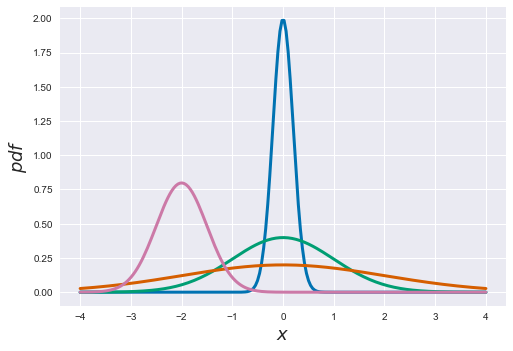

In [2]:
x_values = np.linspace(-4, 4, 200)
values = [(0, .2), (0, 1), (0, 2), (-2, .5)]
color = ['b', 'g', 'r', 'm']
for val, c in zip(values, color):
    gauss = stats.norm(*val).pdf(x_values)
    plt.plot(x_values, gauss, lw=3, color=c)
plt.xlabel('$x$', fontsize=18);
plt.ylabel('$pdf$', fontsize=18);

La integral de la $pdf$ es llamada función de distribución acumulada ($cdf$):

\begin{equation}
cdf(x) = \int_{-\infty}^{x} g(x) d(x)
\end{equation}

En algunas situaciones se prefiere hablar de la función de supervivencia:

\begin{equation}
S(x) = 1 - cdf 
\end{equation}

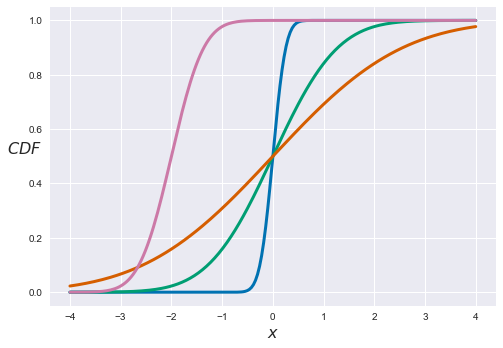

In [3]:
for val, c in zip(values, color):
    gauss = stats.norm(*val).cdf(x_values)
    plt.plot(x_values, gauss, lw=3, color=c)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$CDF$', fontsize=16, rotation=0);

### Variables aleatorias

Una variable aleatoria es una variable que proviene de alguna distribución de probabilidad dada, en la práctica es el resultado de una observación, experimento o simulación. 

Existen dos principales tipos de variables aleatorias, las continuas y las discretas.

En muchos análisis estadísticos se asume que las variables aleatorias provienen de una misma distribución y que son independientes entre si. En estos casos se dice que dichas variables son independientes e idénticamente distribuidas (en ingles iid), es decir:

$p(x,y) = p(x) p(y)$ para todos los valores de $x$ e $y$.

Si una variable aleatoria $x$ proviene o está _distribuida_ según una distribución normal con media $\mu$ y desviación estándar $\sigma$ se suele escribir como:

$$
x \sim \mathcal{N} (\mu, \sigma)
$$

Un caso común de variable aleatoria que no es iid son las series temporales (y las cadenas de Markov) ya que existe una dependencia temporal de los valores que puede tomar una variable.

### Distribuciones de probabilidad comunes

En los siguientes capítulos veremos que los bloques con los cuales se construyen los modelos estadísticos son las distribuciones de probabilidad. A continuación veremos algunas de las más comunes.

#### Distribución uniforme

Aún siendo simple, la distribución [uniforme](https://en.wikipedia.org/wiki/Uniform_distribution_%28continuous%29) es muy usada en estadística, por ej para representar nuestra ignorancia sobre el valor que pueda tomar un parámetro. La distribución uniforme tiene entropía cero (todos los estados son igualmente probables).

$$
p(x|a,b)=\begin{cases} \frac{1}{b-a} & para\ a \le x \le b \\ 0 &  para\ x<a\ o\ x>b \end{cases}
$$

0.5 0.08333333333333333


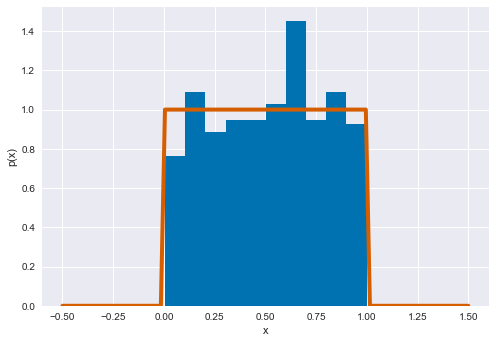

In [4]:
distri = stats.uniform(0, 1)  # distribución uniforme entre a=0 y b=1
x_values = np.linspace(-0.5, 1.5, 100)
x = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, normed=True)
plt.plot (x_values, x_pdf, lw=4, color='r')
plt.xlabel('x')
plt.ylabel('p(x)')

mean, var = distri.stats(moments='mv')
print(mean, var)

#### Distribución Gaussiana (o normal)

Es quizá la [distribución](https://en.wikipedia.org/wiki/Normal_distribution) más conocida. Por un lado por que muchos fenómenos pueden ser descriptos (aproximadamente) usando esta distribución. Por otro lado por que posee ciertas propiedades matemáticas que facilitan trabajar con ella de forma analítica. Es por ello que muchos de los resultados de la estadística frecuentista se basan en asumir una distribución Gaussiana. Por ejemplo el método de los mínimos cuadrados para ajustar modelos lineales no es válido cuando los errores medidos se desvían de una distribución normal.

La distribución Gaussiana se define usando dos parámetros, la media $\mu$ y la desviación estándar $\sigma$. Una distribución Gaussiana con $\mu = 0$ y $\sigma = 1$ es conocida como la _distribución Gaussiana estándar_.

$$
p(x|\mu,\sigma) = \frac{1}{\sigma \sqrt{ 2 \pi}} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2}}
$$

0.0 1.0


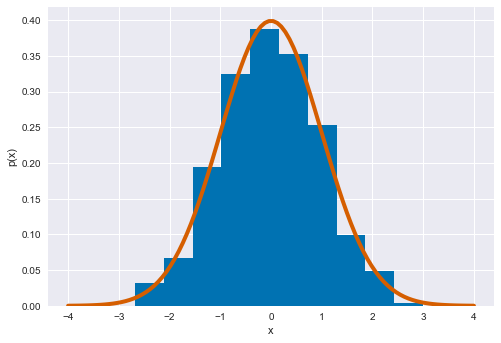

In [5]:
distri = stats.norm(loc=0, scale=1)  # media cero y desviación standard 1
x_values = np.linspace(-4, 4, 100)
x = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, normed=True)
plt.plot (x_values, x_pdf, lw=4, color='r')
plt.xlabel('x')
plt.ylabel('p(x)')

mean, var = distri.stats(moments='mv')
print(mean, var)

#### Distribución t de Student

Históricamente esta [distribución](http://es.wikipedia.org/wiki/Distribuci%C3%B3n_t_de_Student) surgió para estimar la media de una población normalmente distribuida cuando el tamaño de la muestra es pequeño. En estadística Bayesiana su uso más frecuente es el de generar modelos robustos a datos aberrantes, como veremos mas adelante. 


$$p(x\mid \nu,\mu,\sigma) = \frac{\Gamma(\frac{\nu + 1}{2})}{\Gamma(\frac{\nu}{2})\sqrt{\pi\nu}\sigma} \left(1+\frac{1}{\nu}\left(\frac{x-\mu}{\sigma}\right)^2\right)^{-\frac{\nu+1}{2}}
$$

donde $\Gamma$ es la función [gamma](https://en.wikipedia.org/wiki/Gamma_function) y donde $\nu$ es un parámetro llamado _grados de libertad_ (nombre que tiene más sentido en un contexto frecuentista que en uno Bayesiano), como veremos a este parámetro le podríamos llamar _grado de normalidad_, ya que a medida que aumenta la distribución se aproxima a una Gaussiana. En el caso extremo de $\nu = \inf$ la distribución es exactamente igual a una Gaussiana.

En el otro _extremo_, cuando $\nu=1$, (aunque en realidad $\nu$ puede tomar valores por debajo de 1) estamos frente a una distribución de [Cauchy](https://en.wikipedia.org/wiki/Cauchy_distribution). Es similar a una Gaussiana pero las colas decrecen muy lentamente, eso provoca que en teoría esta distribución no poseen una media o varianza definidas. Es decir, es posible calcular a partir de un conjunto de datos una media, pero si los datos provienen de una distribución de Cauchy, la dispersión alrededor de la media será alta y esta dispersión no disminuirá a medida que aumente el tamaño de la muestra. La razón de este comportamiento extraño es que en distribuciones como la Cauchy están dominadas por lo que sucede en las colas de la distribución, contrario a lo que sucede por ejemplo con la distribución Gaussiana.

Para esta distribución $\sigma$ no es la desviación estandard, que como ya se dijo podría estar indefinida, $\sigma$ es la _escala_. A medida que $\nu$ aumenta la _escala_ converge a la desviación estándar de una distribución Gaussiana.

0.0 8.0


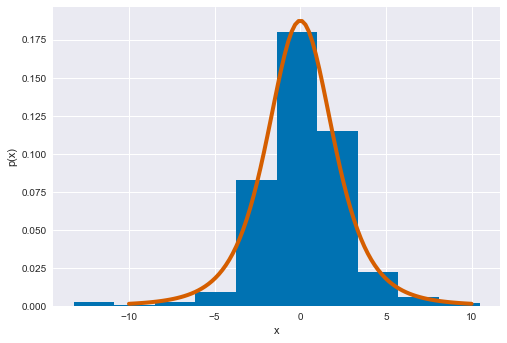

In [6]:
distri = stats.t(loc=0, scale=2, df=4) # media 0, escala 2, grados de libertad 4
x_values = np.linspace(-10, 10, 100)
x = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, normed=True)
plt.plot (x_values, x_pdf, lw=4, color='r')
plt.xlabel('x')
plt.ylabel('p(x)')

mean, var = distri.stats(moments='mv')
print(mean, var)

#### Distribución exponencial

La distribución [exponencial](https://en.wikipedia.org/wiki/Exponential_distribution) se define solo para $x > 0$. Esta distribución se suele usar para describir el tiempo que transcurre entre dos eventos que ocurren de forma continua e independiente a una taza fija. El número de tales eventos para un tiempo fijo lo da la distribución de Poisson (ver más adelante). Nosotros también la usaremos para fijar los _a prioris_ de $nu$ (los grados de libertad de distribución t de Student).

$$
p(x|\lambda) = \lambda e^{-\lambda x}
$$

La media y la desviación estandard de esta distribución están dadas por $\frac{1}{\lambda}$ 

Scipy usa una parametrización  diferente donde la escala es igual a $\frac{1}{\lambda}$

3.0 9.0


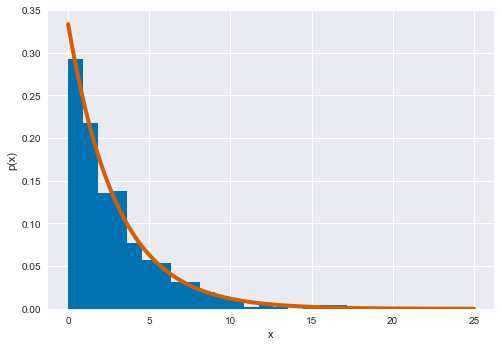

In [7]:
distri = stats.expon(scale=3)  # escala 3, lambda = 1/3
x_values = np.linspace(0, 25, 1000)
x = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, bins=25, normed=True)
plt.plot (x_values, x_pdf, lw=4, color='r')
plt.xlabel('x')
plt.ylabel('p(x)')

mean, var = distri.stats(moments='mv')
print(mean, var)

#### Distribución beta

Es una [distribución](https://en.wikipedia.org/wiki/Beta_distribution) definida en el intervalo [0, 1]. Se usa para modelar el comportamiento de variables aleatorias limitadas a un intervalo finito. Es útil para modelar proporciones o porcentajes. 

$$
p(x|\alpha, \beta)= \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\, x^{\alpha-1}(1-x)^{\beta-1}
$$

El primer término es simplemente una constante de normalización que asegura que la integral de la $pdf$ de 1. $\Gamma$ es la función [gamma](https://en.wikipedia.org/wiki/Gamma_function). Cuando $\alpha=1$ y $\beta=1$ la distribución beta se reduce a la distribución uniforme.

Si queremos expresar la distribución beta en función de la media y la dispersión alrededor de la media podemos hacerlo de la siguiente forma.

$$\alpha = \mu \kappa$$
$$\beta = (1 − \mu) \kappa$$

Siendo $\mu$ la media y $\kappa$ una parámetro llamado concentración a media que $\kappa$ aumenta la dispersión disminuye. Notese, además que $\kappa = \alpha + \beta$.

0.7142857142857143 0.025510204081632654


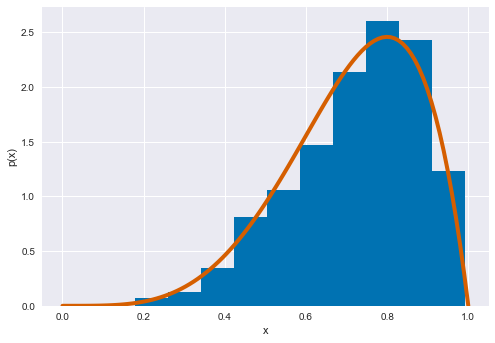

In [8]:
distri = stats.beta(5, 2)  # alfa=5, beta=2
x_values = np.linspace(0, 1, 100)
x = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, normed=True)
plt.plot (x_values, x_pdf, lw=4, color='r')
plt.xlabel('x')
plt.ylabel('p(x)')

mean, var = distri.stats(moments='mv')
print(mean, var)

#### Distribución Gamma

Scipy parametriza a la distribución [gamma](https://en.wikipedia.org/wiki/Gamma_distribution) usando un parámetro $\alpha$ y uno $\theta$, usando estos parámetros la $pdf$ es:

$$
p(x \mid \alpha, \theta) = \frac{1}{\Gamma(\alpha) \theta^\alpha} x^{\alpha \,-\, 1} e^{-\frac{x}{\theta}}
$$

Una parametrización más común en estadística Bayesiana usa los parámetros $\alpha$ y  $\beta$, siendo $\beta = \frac{1}{\theta}$. Esta parametrización es usada por ejemplo por PyMC3. En este caso la pdf queda como:

$$
p(x \mid \alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}
$$

Esta distribución la usaremos principalmente para fijar _a prioris_ para las desviaciones standard (o en general escalas) de otras distribuciones. En muchos casos puede resultar mas útil o intuitivo expresar una distribución gama en función de la media y desviación estandard, siguiendo las siguientes relaciones.

$\alpha = \frac{\mu^2}{\sigma^2}$;
$\beta = \frac{\mu}{\sigma^2}$;
$\theta = \frac{\sigma^2}{\mu}$

Como veremos, PyMC3 permite expresar la distribución gama directamente usando la media y desviación estandard, sin necesidad de tener que convertir parámetros usando las relaciones anteriores.

La distribución gamma se reduce a la exponencial cuando $\alpha=1$.

1.5 0.75


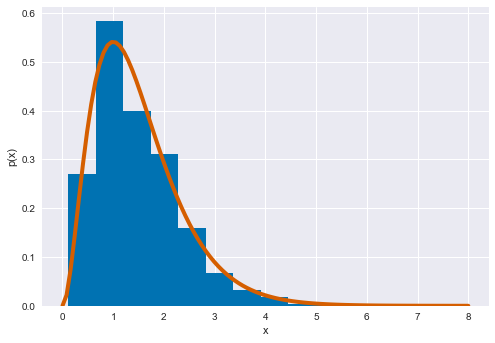

In [9]:
distri = stats.gamma(a=3, scale=0.5)  # alfa 3, theta 0.5
x_values = np.linspace(0, 8, 100)
x = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, normed=True)
plt.plot (x_values, x_pdf, lw=4, color='r')
plt.xlabel('x')
plt.ylabel('p(x)')

mean, var = distri.stats(moments='mv')
print(mean, var)

#### Distribución binomial

Es la [distribución](https://en.wikipedia.org/wiki/Binomial_distribution) de probabilidad discreta que cuenta el número de éxitos en una secuencia de $n$ ensayos de Bernoulli (experimentos si/no) independientes entre sí, con una probabilidad fija $p$ de ocurrencia del éxito entre los ensayos.
Cuando $n=1$ esta distribución se reduce a la distribución de Bernoulli.

$$p(x|n,p) = \frac{n!}{x!(n-x)!}p^x(1-p)^{n-x}$$

El término $p^x(1-p)^{n-x}$ indica la probabilidad de obtener $x$ éxitos en $n$ intentos. Este término solo tiene en cuenta el número total de éxitos obtenidos pero no la secuencia en la que aparecieron. El primer término conocido como **coeficiente binomial** calcula todas las posibles combinaciones de $n$ en $x$, es decir el número de subconjuntos de $x$ elementos escogidos de un conjunto con $n$ elementos.

2.0 1.0


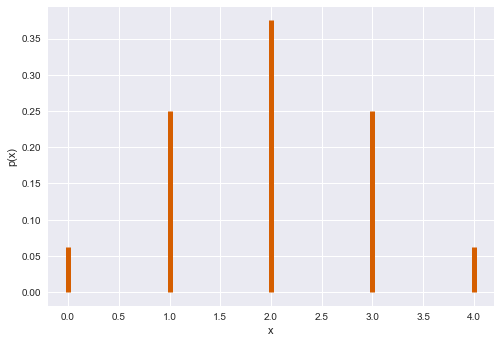

In [10]:
distri = stats.binom(n=4, p=0.5)  # n=número de intentos, p=probabilidad del evento "1"
x_values = np.arange(0, 5)
x_pmf = distri.pmf(x_values)  # la pdf evaluada para todos los x_values
plt.vlines(x_values, 0, x_pmf, colors='r', lw=5)
plt.xlabel('x')
plt.ylabel('p(x)')

mean, var = distri.stats(moments='mv')
print(mean, var)

#### Distribución de Poisson

Es una [distribución](https://en.wikipedia.org/wiki/Poisson_distribution) de probabilidad discreta que expresa la probabilidad que $k$ eventos sucedan en un intervalo fijo de tiempo (o espacio o volumen) cuando estos eventos suceden con una taza promedio $\mu$ y de forma independiente entre si. Se la utiliza para modelar eventos con probabilidades pequeñas (sucesos _raros_), a medida que $\mu$ aumenta la distribución de asemeja cada vez más a una distribución Gaussiana (aunque sigue siendo discreta)

$$
p(k|\mu) = \frac{\mu^{k} e^{-\mu}}{k!}
$$

La media de esta distribución está dada por $\mu$ y la desviación estardad por $\sqrt{\mu}$. A medida que $\mu$ aumenta la distribución de Poisson se aproxima a una distribución Gaussiana.

2.3 2.3


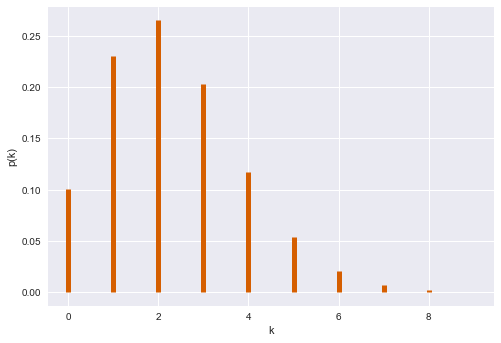

In [11]:
distri = stats.poisson(2.3)  # occurrencia media del evento
x_values = np.arange(0, 10)
x_pmf = distri.pmf(x_values)  # la pdf evaluada para todos los x_values
plt.vlines(x_values, 0, x_pmf, colors='r', lw=5)
plt.xlabel('k')
plt.ylabel('p(k)')

mean, var = distri.stats(moments='mv')
print(mean, var)

## Probability plot

Un método gráfico para comparar si un conjunto de datos se ajusta a una distribución teórica es comparar los valores esperados de la distribución teórica en el eje $x$ y en el eje $y$ los valores de los datos ordenados de menor a mayor. Si la distribución empírica fuese exactamente igual a la teórica los puntos caerían sobre la linea recta a $45^{\circ}$, es decir la linea donde $y = x$.

In [12]:
muestra = np.random.randn(100)

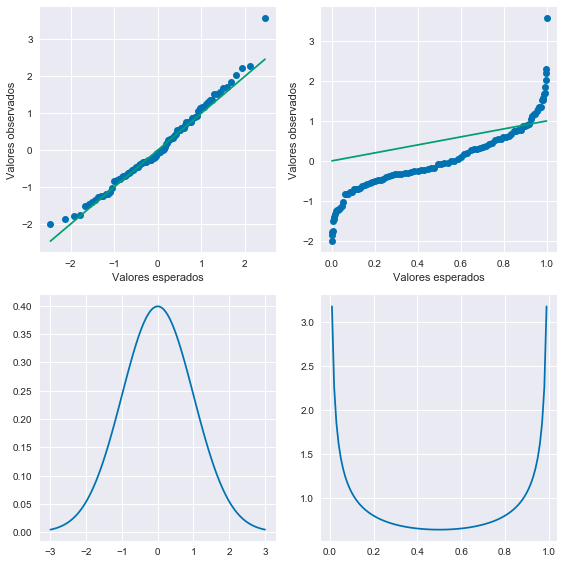

In [13]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
osm, osr = stats.probplot(muestra, fit=False, dist=stats.norm(0, 1))
plt.plot(osm, osr, 'o')
plt.plot(osm, osm)
plt.xlabel('Valores esperados')
plt.ylabel('Valores observados')

plt.subplot(2, 2, 2)
osm, osr = stats.probplot(muestra, fit=False, dist=stats.beta(0.5, 0.5))
plt.plot(osm, osr, 'o')
plt.plot(osm, osm)
plt.xlabel('Valores esperados')
plt.ylabel('Valores observados')

plt.subplot(2, 2, 3)
x = np.linspace(-3, 3, 100)
plt.plot(x, stats.norm(0, 1).pdf(x))

plt.subplot(2, 2, 4)
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta(0.5, 0.5).pdf(x))

plt.tight_layout();

## ¿Por qué Normal?

La distribución Normal (o Gaussiana) aparece una y otra vez en teoría y en la práctica estadística. Esto ocurre principalmente por dos razones.

1. El teorema del límite central garantiza que la distribución Gaussiana surja (casi) siempre que calculemos promedios. 
1. Las distribuciones Gaussianas son, matemáticamente, simples de manipular. Por lo que históricamente han sido la base de la mayoría de los desarrollos en estadística.

## El teorema del límite central

El teorema del límite central dice que si tomamos $n$ valores (de forma independiente) de una distribución arbitraria, la media de esa variables sigue una distribución Gaussiana cuando $lim_{n\to\infty}$. Es decir aun cuando no sepamos nada sobre la distribución que genera los números podemos asegurar que la suma (o el promedio) de esas variables seguirá, de forma aproximada, una distribución Gaussiana.

Este resultado puede parecer sorprendente, pero tiene una explicación simple. Al tomar valores de una distribución los valores altos se compensan (en promedio) con los valores bajos, por lo que terminamos obteniendo una distribución suave y con un solo pico. Por supuesto este experimento mental no nos dice que la distribución deba ser una Gaussiana, para confirmar esto hay que sentarse y resolver el problema matemáticamente (o hacer una simulación como haremos brevemente)

Para que el teorema del límite central se cumpla se deben cumplir los siguientes supuestos.

1. Las variables se muestrean de forma independiente
1. Las variables provienen de la misma distribución
1. La media y la desviación estándar de la distribución tiene que ser finita

Los criterios 1 y 2 se pueden relajar _bastante_ y aún así obtendremos aproximadamente una Gaussiana, pero del criterio 3 no hay forma de escapar. Para distribuciones como la distribución de Cauchy o Paretto, que no posen varianza definida este teorema no se aplica. El promedio de $N$ valores provenientes de una distribución Cauchy no siguen una Gaussiana sino una distribución de Cauchy.

El teorema del límite central explica la prevalencia de la distribución Gaussiana en la naturaleza. Muchos de los fenómenos que estudiamos se pueden explicar como fluctuaciones alrededor de una media, es decir tiene que ver con el cálculo de promedios.

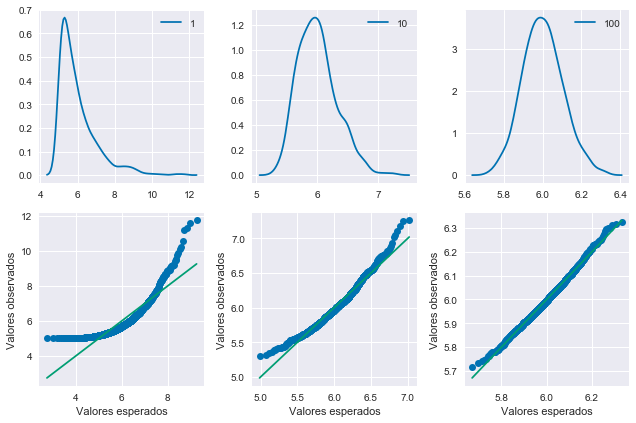

In [14]:
plt.figure(figsize=(9,6))
iters = 1000
distri = stats.expon(5)
for i, n in enumerate([1, 10, 100]):
    sample = np.mean(distri.rvs((n, iters)), axis=0)
    plt.subplot(2, 3, i+1)
    sns.kdeplot(sample, label=n)
    plt.subplot(2, 3, i+4)
    osm, osr = stats.probplot(sample, dist=stats.norm(sample.mean(), sample.std()), fit=False)
    plt.plot(osm, osr, 'o')
    plt.plot(osm, osm)
    plt.xlabel('Valores esperados')
    plt.ylabel('Valores observados')

plt.tight_layout()

## La ley de los grandes números (el casino siempre gana).

El valor promedio calculado para una muestra converge al valor esperado (media) de dicha distribución. Al igual que el teorema del límite central esto no es cierto para la distribución de Cauchy (la cual no tiene media finita).

La ley de los grandes números se suele malinterpretar y dar lugar a la paradoja del apostador. Un ejemplo de esta paradoja es creer que conviene apostar en la lotería/quiniela a un número _atrasado_, es decir un número que hace tiempo que no sale. El razonamiento, erróneo, es que como todos los números tienen la misma probabilidad a largo plazo (según la ley de los grande números) si un número viene _atrasado_ entonces hay alguna especie de fuerza que aumenta la probabilidad de ese número en el próximo sorteo para así re-establecer la equiprobabilidad de los números. 

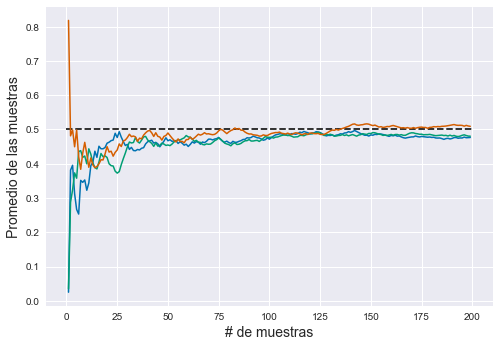

In [15]:
tamaño_muestra = 200
muestras = range(1, tamaño_muestra)
media = 0.5

for _ in range(3):
    muestra = stats.uniform(0, 1).rvs(tamaño_muestra)
    promedio = [muestra[:i].mean() for i in muestras]
    plt.plot(muestras, promedio, lw=1.5)

plt.hlines(media, 0, tamaño_muestra, linestyle='--', color='k')
plt.ylabel("Promedio de las muestras", fontsize=14)
plt.xlabel("# de muestras", fontsize=14);